In [9]:
from dataProcessing import *
%matplotlib inline

In [6]:
madd23 = []
mid_madds = []
for m in [2, 3]:
    month_dpath = get_base_dpath(m)
    muleID_fpath = opath.join(month_dpath, '_muleID-M%d.pkl' % m)
    with open(muleID_fpath, 'rb') as fp:
        madd_mid, mid_madd = pickle.load(fp)
        madd23.append(set(madd_mid.keys()))
        mid_madds.append(mid_madd)
madd2, madd3 = madd23
madd_intersection = madd2.intersection(madd3)
print("# mules for both months: %d" % len(madd_intersection))

# mules for both months: 28261


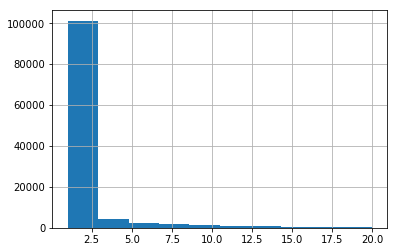

In [10]:
month = 2
df = pd.read_csv(opath.join(get_base_dpath(month), 'M2-aggIndiDur.csv'))
df = df.groupby(['mid', 'day']).sum()['duration'].reset_index()
df = df.groupby(['mid']).count()['day'].to_frame('days').reset_index()
df['days'].hist()


# of active mules: 7951


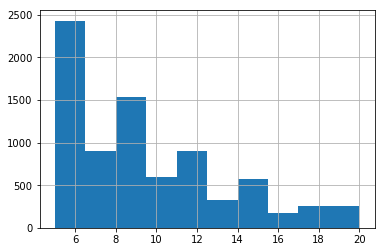

In [11]:
df = df[(df['days'] > LEAST_DAYS)]
active_mids = set(df['mid'])
print('# of active mules: %d' % len(active_mids))
df['days'].hist()